## Validation du code | Test de comparaison des moyennes d'intensité sur les deux jeux d'AGB | 16 parcelles - 85 parcelles

### Bibliothèques

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

In [2]:
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as scpstats
from croscor import *
import csv

### Affichage pimpé

In [3]:
#plt.style.use("seaborn")
mpl.rcParams['figure.dpi'] = 100

### Chargement des données | Image satellite - Relevé topographique

In [5]:
band1 = np.load("../data/band1.npy")
band2 = np.load("../data/band2.npy")

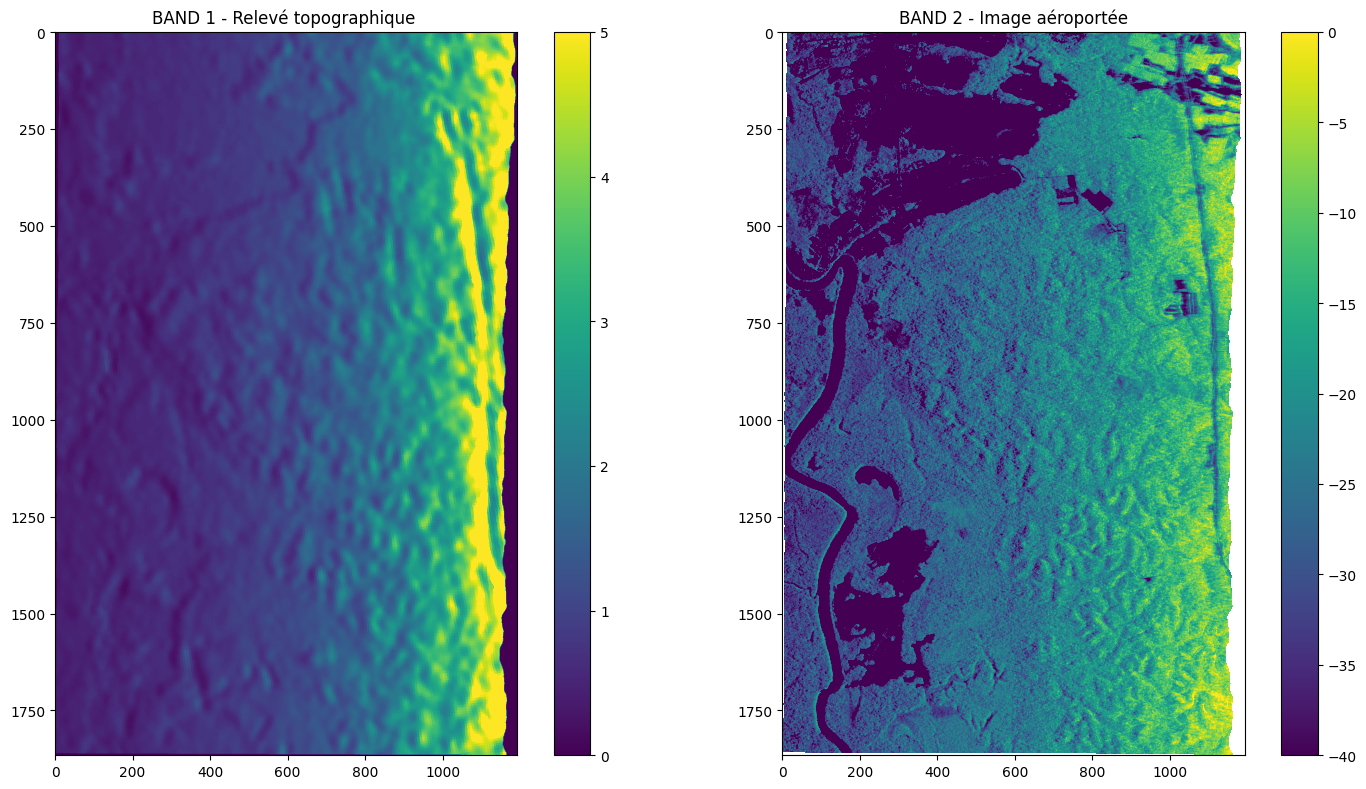

In [5]:
miseEnBouche(band1,band2)


### Chargement de ROI - COORDONNEES

In [9]:
def loadParcels16(num = None):
    if num == None: # On charge toutes les parcelles dans une liste
        parcels = []
        for i in range(1,17):
            parcels.append(np.loadtxt("../data/16ROI/indcsROI_PAR" +"{:02d}".format(i)+ ".dat"))
        return [x.astype(int) for x in parcels]
    else: #  On charge uniquemnent la parcelle numéro "num"
        parcel = np.loadtxt("../data/16ROI/indcsROI_PAR" +"{:02d}".format(num)+ ".dat")
        return parcel.astype(int)

In [10]:
def loadParcels85(numParcel = None, numSubParcel = None):
    if numParcel == None: # On charge toutes les parcelles dans une liste
        parcels = []
        for i in range(1,17):
            if i != 16 :
                for j in range(1,5):
                    parcels.append(np.loadtxt("../data/85ROI/indcsROI_PAR" +"{:02d}".format(i)+"_"+"{:01d}".format(j)+ ".dat"))
            elif i == 16 :
                for j in range(1,26):
                    parcels.append(np.loadtxt("../data/85ROI/indcsROI_PAR" +"{:02d}".format(i)+"_"+"{:03d}".format(j)+ ".dat"))
        return [x.astype(int) for x in parcels]
    else: #  On charge uniquemnent la parcelle numéro "num"
        if numParcel != 16 :   
            parcel = np.loadtxt("../data/85ROI/indcsROI_PAR" +"{:02d}".format(numParcel)+"_"+"{:01d}".format(numSubParcel)+ ".dat")
        elif numParcel == 16 : 
            parcel = np.loadtxt("../data/85ROI/indcsROI_PAR" +"{:02d}".format(numParcel)+"_"+"{:03d}".format(numSubParcel)+ ".dat")
        return parcel.astype(int)

### Chargement des ROI - BIOMASSE

In [11]:
def loadBiomass16(num = None):
    if num == None : 
        bmssList = np.loadtxt("../data/16insituAGB.dat")
    else:
        l = np.loadtxt("../data/16insituAGB.dat")
        bmssList = l[num - 1]
    return bmssList

In [12]:
def loadBiomass85(num = None):
    if num == None : 
        bmssList = np.loadtxt("../data/85insituAGB.dat")
    else:
        l = np.loadtxt("../data/85insituAGB.dat")
        bmssList = l[num - 1]
    return bmssList

### Affichage des ROI | Jeu de 16 parcelles 

In [13]:
def plotParcels16(numList = None):
    band2 = np.load("../data/band2.npy")
    plt.figure(1)
    plt.imshow(band2)
    if numList == None :
        Parcels = loadParcels16()
        for i in range(16):
            X = Parcels[i]
            plt.scatter(X[:,0], X[:,1])
            plt.savefig("parcel.png")
    else:
        Parcels = loadParcels16()
        for j in numList:
            X = Parcels[j]
            plt.scatter(X[:,0], X[:,1])
            plt.savefig("parcel.png")

In [14]:
#plotParcels16()

### Affichage des ROI | Jeu de 85 parcelles 

In [15]:
def plotParcels85(numList = None):
    band2 = np.load("../data/band2.npy")
    plt.figure(1, figsize = (30,12))
    plt.imshow(band2)
    if numList == None :
        Parcels = loadParcels85()
        for i in range(85):
            X = Parcels[i]
            plt.scatter(X[:,0], X[:,1],0.1)
            plt.savefig("parcel.png")
    else:
        Parcels = loadParcels85()
        for j in range(85):
            X = Parcels[j]
            plt.scatter(X[:,0], X[:,1],0.1)
            plt.savefig("parcel.png")

In [16]:
#plotParcels85()

### INTENSITE D'UNE ZONE

In [17]:
def IntensityZone(X,img):
    IntTab = []
    n,m = np.shape(X)
    for i in range(n):
        IntTab.append(img[X[i][1],X[i][0]])
    Intmean = np.mean(np.array(IntTab))
    return Intmean, IntTab

### CORRESPONDANCE DES JEUX DE PARCELLES
Il retourne la liste des indices des sous parcelles correspondantes pour chacune des 16 grandes parcelles, soit des listes de nombres entre 1 et 85.

In [23]:
def correspParcels():
    listIndices = []
    for i in range(0,15) :
        l = [i for i in range(i*4,(i+1)*4)]
        listIndices.append(l)
    listIndices.append([i for i in range(60,85)])
    return listIndices

In [24]:
#correspParcels()

### COMPARAISON DES JEUX DE DONNEES BIOMASSE


In [25]:
def compareData(img):
    # ABSCISSES
    indices = np.linspace(1,16,16)
    
    ################################################
    # 4 jeux de données pour les graphes | ORDONNEES
    ################################################
    
    # Les valeurs de biomasse pour les 16 parcelles (16 valeurs)
    valBiomass16ROI = loadBiomass16()
    
    # Moyennes de biomasse pour les sous-parcelles (16 valeurs)
    valBiomass85ROI = loadBiomass85()
    Indices85 = correspParcels()
    
    meanBiomassList = []
    for i in range(len(Indices85)):
        print(i)
        print(Indices85[i])
        mean = 0
        for j in Indices85[i]:
            mean += valBiomass85ROI[j]
        mean /= len(Indices85[i])
        meanBiomassList.append(mean)
    
    # Intensités pour les 16 parcelles (16 valeurs)
    X16 = loadParcels16()
    listInt16 = []
    for i in range(len(X16)):
        intmean = IntensityZone(X16[i],img)[0]
        listInt16.append(intmean)
    
    # Moyennes des intensités des sous-parcelles (16 valeurs)
    X85 = loadParcels85()
    listInt85_to_16 = []
    
    for i in range(16):
        meanInt = 0
        for j in Indices85[i]:
            meanInt += IntensityZone(X85[j],img)[0]
        meanInt /= len(Indices85[i])
        listInt85_to_16.append(meanInt)
    
    plt.figure(1)
    fig, ax = plt.subplots(2,2, figsize = (8,8))
    
    ax[0,0].plot(indices,valBiomass16ROI)
    ax[0,0].set_title("Biomasse des 16  ROI")
    
    ax[0,1].plot(indices,meanBiomassList)
    ax[0,1].set_title("Moyennes de biomasse des 85  ROI")
    
    ax[1,0].plot(indices,listInt16)
    ax[1,0].set_title("Intensités des 16  ROI")
    
    ax[1,1].plot(indices,listInt85_to_16)
    ax[1,1].set_title("Moyennes des intensités des 85  ROI")
    
    fig.suptitle("Comparaison des données Biomasse et intensité | 16 parcelles - 85 parcelles")
    
    plt.savefig("../results/testMoyennesBiomasseIntensite.png")
    
    ###################################################################
    # TRACE DE LA BIOMASSE DES 16 ROI EN FONCTION DE CELLE DES 85 ROI #
    ###################################################################
    
    plt.figure(2)
    fig2, ax2 = plt.subplots(1,2,figsize = (8,8))
    
    ax2[0].scatter(valBiomass16ROI,meanBiomassList)
    ax2[0].set_title("85ROI en fonction de 16ROI")
    
    ax2[1].scatter(meanBiomassList,valBiomass16ROI)
    ax2[1].set_title("16ROI en fonction de 85ROI")
    
    #fig.suptitle("Biomasse des deux jeux de ROI")


0
[0, 1, 2, 3]
1
[4, 5, 6, 7]
2
[8, 9, 10, 11]
3
[12, 13, 14, 15]
4
[16, 17, 18, 19]
5
[20, 21, 22, 23]
6
[24, 25, 26, 27]
7
[28, 29, 30, 31]
8
[32, 33, 34, 35]
9
[36, 37, 38, 39]
10
[40, 41, 42, 43]
11
[44, 45, 46, 47]
12
[48, 49, 50, 51]
13
[52, 53, 54, 55]
14
[56, 57, 58, 59]
15
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]


<Figure size 800x550 with 0 Axes>

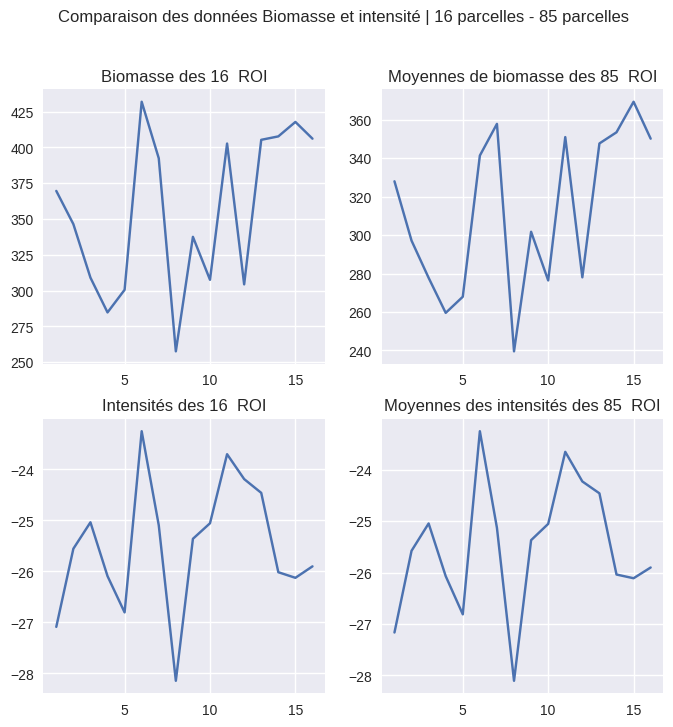

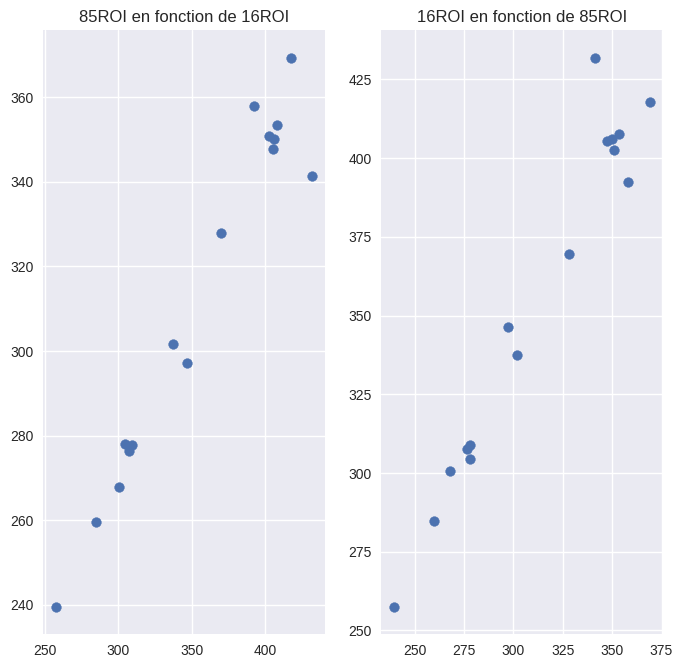

In [26]:
img = 10*np.log(band2/band1)
compareData(img)

In [27]:
cwd = os.getcwd()
os.chdir("../data/"+str(85)+"ROI/")
rez = os.popen('ls -t').read()
os.chdir(cwd)
print(rez)

indcsROI_PAR16_005.dat
indcsROI_PAR16_006.dat
indcsROI_PAR16_007.dat
indcsROI_PAR16_008.dat
indcsROI_PAR16_009.dat
indcsROI_PAR16_010.dat
indcsROI_PAR16_011.dat
indcsROI_PAR16_012.dat
indcsROI_PAR16_013.dat
indcsROI_PAR16_014.dat
indcsROI_PAR16_015.dat
indcsROI_PAR16_016.dat
indcsROI_PAR16_017.dat
indcsROI_PAR16_018.dat
indcsROI_PAR16_019.dat
indcsROI_PAR16_020.dat
indcsROI_PAR16_021.dat
indcsROI_PAR16_022.dat
indcsROI_PAR16_023.dat
indcsROI_PAR16_024.dat
indcsROI_PAR16_025.dat
indcsROI_PAR07_2.dat
indcsROI_PAR07_3.dat
indcsROI_PAR07_4.dat
indcsROI_PAR08_1.dat
indcsROI_PAR08_2.dat
indcsROI_PAR08_3.dat
indcsROI_PAR08_4.dat
indcsROI_PAR09_1.dat
indcsROI_PAR09_2.dat
indcsROI_PAR09_3.dat
indcsROI_PAR09_4.dat
indcsROI_PAR10_1.dat
indcsROI_PAR10_2.dat
indcsROI_PAR10_3.dat
indcsROI_PAR10_4.dat
indcsROI_PAR11_1.dat
indcsROI_PAR11_2.dat
indcsROI_PAR11_3.dat
indcsROI_PAR11_4.dat
indcsROI_PAR12_1.dat
indcsROI_PAR12_2.dat
indcsROI_PAR12_3.dat
indcsROI_PAR12_4.dat
indcsROI_PAR13_1.dat
indcsROI_PAR1

In [28]:
num = 85
choiceSimple("../data/"+str(num)+"ROI/",all=True)

['indcsROI_PAR16_005.dat',
 'indcsROI_PAR16_006.dat',
 'indcsROI_PAR16_007.dat',
 'indcsROI_PAR16_008.dat',
 'indcsROI_PAR16_009.dat',
 'indcsROI_PAR16_010.dat',
 'indcsROI_PAR16_011.dat',
 'indcsROI_PAR16_012.dat',
 'indcsROI_PAR16_013.dat',
 'indcsROI_PAR16_014.dat',
 'indcsROI_PAR16_015.dat',
 'indcsROI_PAR16_016.dat',
 'indcsROI_PAR16_017.dat',
 'indcsROI_PAR16_018.dat',
 'indcsROI_PAR16_019.dat',
 'indcsROI_PAR16_020.dat',
 'indcsROI_PAR16_021.dat',
 'indcsROI_PAR16_022.dat',
 'indcsROI_PAR16_023.dat',
 'indcsROI_PAR16_024.dat',
 'indcsROI_PAR16_025.dat',
 'indcsROI_PAR07_2.dat',
 'indcsROI_PAR07_3.dat',
 'indcsROI_PAR07_4.dat',
 'indcsROI_PAR08_1.dat',
 'indcsROI_PAR08_2.dat',
 'indcsROI_PAR08_3.dat',
 'indcsROI_PAR08_4.dat',
 'indcsROI_PAR09_1.dat',
 'indcsROI_PAR09_2.dat',
 'indcsROI_PAR09_3.dat',
 'indcsROI_PAR09_4.dat',
 'indcsROI_PAR10_1.dat',
 'indcsROI_PAR10_2.dat',
 'indcsROI_PAR10_3.dat',
 'indcsROI_PAR10_4.dat',
 'indcsROI_PAR11_1.dat',
 'indcsROI_PAR11_2.dat',
 'indcsR

In [29]:
#miseEnBouche(band1,band2)

In [6]:
def printRroi():
    margin = 64
    (x0,x1,y0,y1) = (30 + 2 * 256 - margin, 1054 + margin, 215 + 3 * 256, 1751 + margin)
    coord = (x0,x1,y0,y1)
    zone = selection(band2,coord,True)

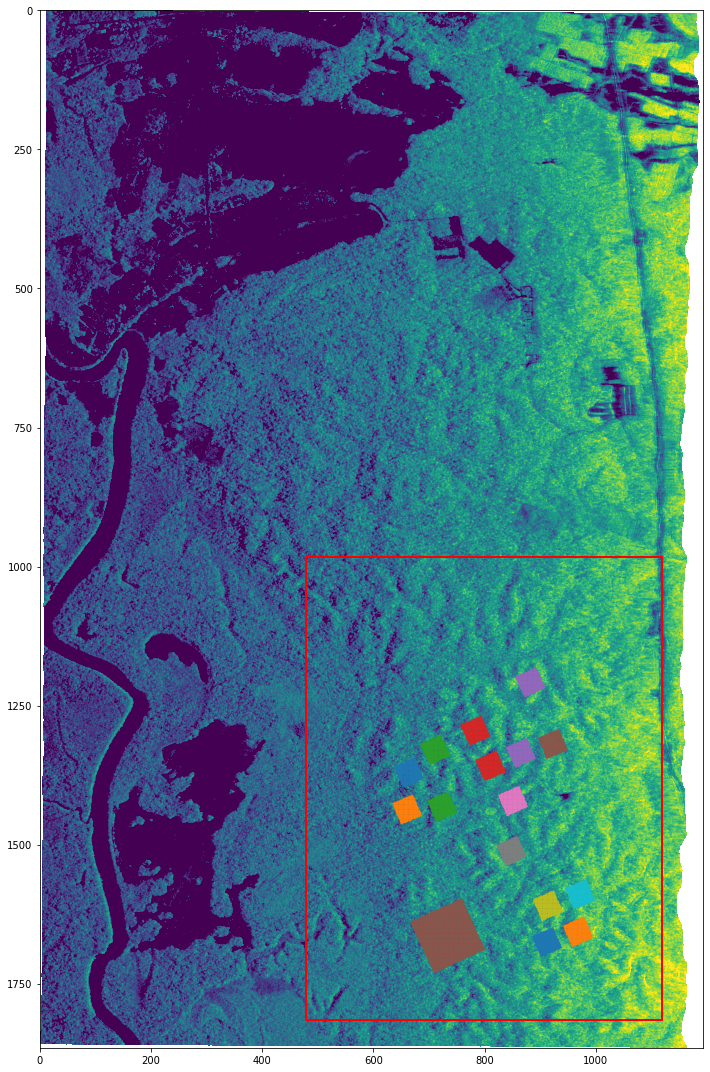

In [7]:
printRroi()

In [32]:
b1,b2 = shiftSelec(band1,band2,15,15)

In [33]:

"""
Vérifier qu'on trouve quelque chose de très proche de 0 après déplacement en refaisant un tour
ok
"""
def multichoice():
    ok = True
    choices = []
    while ok:
        choices.append(choice())
        print('\n #######')
        print("Choices :",choices)
        print('\n #######')
        cin = input('Press Enter to continue or type no')
        if cin == 'no':
            ok = False
    return choices

def apply_displacement(band1,coord,choices):
    img = np.copy(band1)
    (x0,x1,y0,y1) = coord
    imgs = []
    for tabname in choices:  
        features = ExtractFeatures(tabname)
        print(features["ax0"],features["ax1"])
        img = np.roll(np.roll(band1,- int(features["ax0"]),axis=0),- int(features["ax1"]),axis=1)
        tab = np.load(tabname)
        xm = np.mean(tab[0])
        ym = np.mean(tab[1])
        #print((xm,ym))
        img_new = np.roll(np.roll(img, - int(ym),axis=0), int(xm),axis=1)
        imgs.append(img_new)
    imgs.append(band1)
    return imgs#, selection(img_new,coord)


def versus(img1,img2):
    
    fig,ax = plt.subplots(1,2, figsize=(15,8))
    im1 = ax[0].imshow(10*np.log(img1),vmin=-40,vmax=0)
    ax[0].set_title("BAND 1 - original")
    fig.colorbar(im1,ax=ax[0])

    im2 = ax[1].imshow(10*np.log(img2),vmin=-40,vmax=0)
    ax[1].set_title("BAND 1 - déplacement")
    fig.colorbar(im2,ax=ax[1])

    plt.tight_layout()
    plt.show()

def pltBiomass(imgs, choices,num,output = False): #img est l'image corrigée - rapport band2/band1-corrigee
    BiomassData = loadBiomass(num)
    band1 = np.load("../data/band1.npy")
    band2 = np.load("../data/band2.npy")
    pearsonr = []
    Parcels = loadParcels(num)
    plt.figure(1, figsize=(10,5))
    i = 0
    for img in imgs:
        IntensityData = []
        for X in Parcels:
            IntensityZone_X = IntensityZone(X,10*np.log((band2/img)))
            #IntensityZone_X = IntensityZone(X,band2/img)
            IntensityData.append(IntensityZone_X[0])

        sortedData = sortBiomInt(BiomassData,IntensityData)
        if output : 
            print(sortedData)
            print("---------------------------------------------")

        pearsonr.append(scpstats.pearsonr(sortedData[:,0],sortedData[:,1]))
        if i < len(choices):
            features = ExtractFeatures(choices[i])
            label = features
        else:
            label = "ref"
        plt.scatter(sortedData[:,0],sortedData[:,1], label = label)
        i += 1
    plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
    plt.ylim((-30,-10))
    plt.title("Intensité image en fonction de la biomasse sur 16 ROI de forêt")
    plt.xlabel("Qté de biomasse de 16 parcelles (Ordre croissant de qté)")
    plt.xlim((200,500))
    plt.ylabel("Intensité image parcelle")
    plt.savefig("../results/plotMaternelle1.png")
    plt.show()
    
    return pearsonr
    
def main(num):
    (x0,x1,y0,y1) = (30 + 2 * 256, 1054, 215 + 3 * 256, 1751)
    coord = (x0,x1,y0,y1)
    choices = choice()
    imgs = apply_displacement(band1,coord,choices)
    pearson = pltBiomass(imgs,choices,num,False)
    print("\n---------------------------------------------")

    print("\n \n Coefs de pearson :")
    wanted_keys = ['ax0', 'ax1', 'f'] # The keys you want
    for i in range(len(choices)):
        features = ExtractFeatures(choices[i])
        features_list = [(k,features[k]) for k in wanted_keys]
        print(features_list,pearson[i])
        #print(features[, pearson[i])
    print('ref', pearson[-1])
    #pearsonr = plotBiomasse(b1_new)
    #np.save('../decoup/band1_new.npy',b1_new)
    #versus(band2/b1_new,band2/band1)


In [4]:
#main(16)

In [ ]:
#main(85)